<a href="https://colab.research.google.com/github/Arun2212/ak/blob/main/IPL_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary Libraries**


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf


**Loading the dataset**

Dataset can be downloaded from [here](
  https://drive.google.com/file/d/1qlm4OnaAM3bdgti9xyUqK3eSFokjYdA-/view)

In [9]:
pd.set_option('max_colwidth', 100)
IPL_Data = pd.read_csv('ipl_data.csv')
IPL_Data

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [10]:
#viewing first 5 rows

IPL_Data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


**DATA PREPROCESSING**

Dropping Duplicates, Unnecessary Features, Label Encoding, Train Test Split, Feature Scaling


In [11]:
IPL_Data.drop_duplicates
IPL_Data.shape #no duplicates found

(76014, 15)

In [12]:
#Dropping certain features
df = IPL_Data.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [13]:
X = df.drop(['total'], axis =1)
y = df['total']


In [14]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [15]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [49]:
X_train

,venue,bat_team,bowl_team,batsman,bowler
31043,15,12,0,78,121
1720,22,2,4,393,48
62369,14,12,13,384,175
74763,21,4,6,398,157
10506,2,7,2,266,218
...,...,...,...,...,...
37194,34,6,7,221,272
6265,26,7,9,347,292
54886,1,7,0,213,183
860,15,0,7,258,275


In [31]:
X_test

,venue,bat_team,bowl_team,batsman,bowler
12590,18,2,12,122,128
74893,9,3,2,171,72
56763,34,7,0,133,228
19428,1,7,2,350,210
30216,5,0,1,284,40
...,...,...,...,...,...
52464,14,12,2,19,191
23921,8,2,4,93,207
24202,26,5,9,284,280
61097,22,4,0,126,7


In [50]:
y_train

31043    205
1720     158
62369    227
74763    167
10506    116
        ... 
37194    140
6265     145
54886    173
860      208
15795    171
Name: total, Length: 53209, dtype: int64

In [51]:
y_test

12590    134
74893    195
56763    183
19428    183
30216    193
        ... 
52464    186
23921    231
24202    109
61097    130
62584    163
Name: total, Length: 22805, dtype: int64

In [16]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
X_test_scaled

array([[0.52941176, 0.15384615, 0.92307692, 0.29756098, 0.3902439 ],
       [0.26470588, 0.23076923, 0.15384615, 0.41707317, 0.2195122 ],
       [1.        , 0.53846154, 0.        , 0.32439024, 0.69512195],
       ...,
       [0.76470588, 0.38461538, 0.69230769, 0.69268293, 0.85365854],
       [0.64705882, 0.30769231, 0.        , 0.30731707, 0.02134146],
       [0.73529412, 0.84615385, 0.23076923, 0.2902439 , 0.25      ]])

In [47]:
X_train_scaled

array([[0.44117647, 0.92307692, 0.        , 0.1902439 , 0.36890244],
       [0.64705882, 0.15384615, 0.30769231, 0.95853659, 0.14634146],
       [0.41176471, 0.92307692, 1.        , 0.93658537, 0.53353659],
       ...,
       [0.02941176, 0.53846154, 0.        , 0.5195122 , 0.55792683],
       [0.44117647, 0.        , 0.53846154, 0.62926829, 0.83841463],
       [0.41176471, 0.92307692, 0.        , 0.93658537, 0.5152439 ]])

**Model Training**

In [17]:
# Define the neural network model
model = keras.Sequential([
	keras.layers.Input( shape=(X_train_scaled.shape[1],)), # Input layer
	keras.layers.Dense(512, activation='relu'), # Hidden layer with 512 units and ReLU activation
	keras.layers.Dense(216, activation='relu'), # Hidden layer with 216 units and ReLU activation
	keras.layers.Dense(1, activation='linear') # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0) # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss) # Use Huber loss for regression


In [18]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
832/832 [==============================] - 5s 5ms/step - loss: 31.8690 - val_loss: 22.0676
Epoch 2/50
832/832 [==============================] - 5s 6ms/step - loss: 22.3528 - val_loss: 22.0022
Epoch 3/50
832/832 [==============================] - 4s 5ms/step - loss: 22.2662 - val_loss: 21.9144
Epoch 4/50
832/832 [==============================] - 5s 6ms/step - loss: 22.2535 - val_loss: 21.9478
Epoch 5/50
832/832 [==============================] - 4s 5ms/step - loss: 22.2324 - val_loss: 21.8961
Epoch 6/50
832/832 [==============================] - 4s 5ms/step - loss: 22.2023 - val_loss: 21.8529
Epoch 7/50
832/832 [==============================] - 6s 7ms/step - loss: 22.1586 - val_loss: 21.8194
Epoch 8/50
832/832 [==============================] - 4s 5ms/step - loss: 22.1063 - val_loss: 21.9073
Epoch 9/50
832/832 [==============================] - 4s 5ms/step - loss: 22.0992 - val_loss: 21.9161
Epoch 10/50
832/832 [==============================] - 5s 7ms/step - loss: 22.1136

<Axes: >

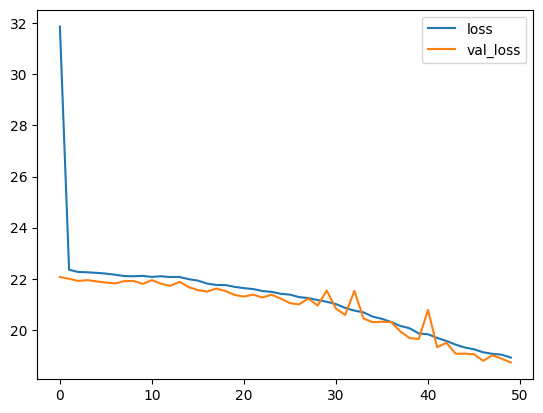

In [19]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


In [20]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 [==============================] - 1s 2ms/step


19.216377107419092

**Predictions with Interactive Widget**

In [33]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
	with output:
		clear_output() # Clear the previous output


		# Decode the encoded values back to their original values
		decoded_venue = venue_encoder.transform([venue.value])
		decoded_batting_team = batting_team_encoder.transform([batting_team.value])
		decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
		decoded_striker = striker_encoder.transform([striker.value])
		decoded_bowler = bowler_encoder.transform([bowler.value])


		input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
		input = input.reshape(1,5)
		input = scaler.transform(input)
		#print(input)
		predicted_score = model.predict(input)
		predicted_score = int(predicted_score[0,0])

		print("Score prediction:", predicted_score)


In [34]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()